# Used cars market facts

As an aspiring Data Analyst, (or scientist ? or machine learning engineer ? work in progress ...) I am fascinated by the data. When I had to make a project, as a part of my training with Jovian [[Data Analysis with Python: Zero to Pandas]](zerotopandas.com), I tried to combine my passion for data and my all-time favorite topic : Cars !<br>
As a car-enthousiast, I like working on cars. I'm often in the market for used cars and parts. The buying process involves lots of research and comparison. The ultimate goal is to get the best deal, using all the available tools.<br>
___But what is a good deal ?___<br>
While many parameters influence a car buyer, the decision always involves _emotion_. The first thing to consider before taking any __decision__ is to have as much __good quality data__ as possible. We have then to perform analysis and extract informations.<br>
In this notebook, I study a public dataset available on [KAGGLE](kaggle.com). The dataset is scraped from __Craiglist__, a very popular classified ads in the US, and north America. It contains informations from around 450k car classified ads. It is updated every 18 months and contains a fair amount of properties for each transaction (26 columns). More details can be found on [this link](https://www.kaggle.com/austinreese/craigslist-carstrucks-data).


In [1]:
!pip install opendatasets pandas --quiet


Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
  0%|          | 0.00/267M [00:00<?, ?B/s]Downloading craigslist-carstrucks-data.zip to .\craigslist-carstrucks-data
100%|██████████| 267M/267M [01:16<00:00, 3.66MB/s]



The dataset has been downloaded and extracted.

In [3]:
data_dir = './craigslist-carstrucks-data'
import os
os.listdir(data_dir)

['vehicles.csv']

## Data Preparation and Cleaning

First step is to explore the file we've just downloaded. Let's use pandas to open this csv.

In [4]:
import pandas as pd
import numpy as np
cars_df = pd.read_csv(data_dir+'/vehicles.csv')

Let us have a first look at this dataset :

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441396 entries, 0 to 441395
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            441396 non-null  int64  
 1   url           441396 non-null  object 
 2   region        441396 non-null  object 
 3   region_url    441396 non-null  object 
 4   price         441396 non-null  int64  
 5   year          440359 non-null  float64
 6   manufacturer  423019 non-null  object 
 7   model         436057 non-null  object 
 8   condition     257554 non-null  object 
 9   cylinders     253231 non-null  object 
 10  fuel          438515 non-null  object 
 11  odometer      437018 non-null  float64
 12  title_status  432451 non-null  object 
 13  transmission  438769 non-null  object 
 14  VIN           277315 non-null  object 
 15  drive         307747 non-null  object 
 16  size          125812 non-null  object 
 17  type          346047 non-null  object 
 18  pain

This Dataframe has 25 columns of various type. It contains 441396 rows. Each row represents a car ad with all the available properties. Some columns are full (like price, region, etc) while some other columns are incomplete (exple : VIN, size etc). Let's explore the columns:

In [6]:
cars_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

The next step is to describe each column, and handle missing or wrong data. First we can remove all the unnecessary columns (for our project):   **'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'size'**

In [7]:
remove_columns = ['url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'size']
for column in remove_columns:
    cars_df.drop(column, axis = 1, inplace= True)

The next cell, shows the number of missing elements for each column:

In [8]:
for column in cars_df.columns:
    print('Column :', column)
    print('Number of Nan', cars_df[column].isna().sum())
    print(cars_df[column].describe())
    print('****************************')

Column : id
Number of Nan 0
count    4.413960e+05
mean     7.302968e+09
std      4.524183e+06
min      7.208550e+09
25%      7.299673e+09
50%      7.303986e+09
75%      7.306984e+09
max      7.308634e+09
Name: id, dtype: float64
****************************
Column : region
Number of Nan 0
count       441396
unique         404
top       columbus
freq          3742
Name: region, dtype: object
****************************
Column : price
Number of Nan 0
count    4.413960e+05
mean     6.400219e+04
std      1.109241e+07
min      0.000000e+00
25%      5.950000e+03
50%      1.347750e+04
75%      2.499900e+04
max      3.736929e+09
Name: price, dtype: float64
****************************
Column : year
Number of Nan 1037
count    440359.000000
mean       2011.491508
std           9.271752
min        1900.000000
25%        2009.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
****************************
Column : manufacturer
Number of Nan 1837

The number of empty cells varies among columns. For this project, the main columns are **price** and **year**. According to the previous cell, no price row is empty ! (we still need to look for outliers). The **year** column contains some empty cells, that we choose to simply drop.

In [9]:
cars_df.dropna(subset=['year'], axis = 0, inplace=True)

Categorical data could be useful in some analysis. Here, two columns are created in order to classify the price, and the odometer reading: 

In [10]:
bins=[0,10000,20000,30000,40000]
cars_df['price_cat'] = pd.cut(cars_df['price'] , bins=bins , labels=[1,2,3,4])

In [11]:
bins = [0,25000,50000,100000,np.inf]    
cars_df['odo_cat'] = pd.cut(cars_df['odometer'], bins = bins, labels = [1,2,3,4])

## Exploratory Analysis and Visualization

In this section, we will consider some columns and study their statistical properties.  
Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In this graph, we will determine the number of cars from each manufacturer. The plot will show the top 15 : 

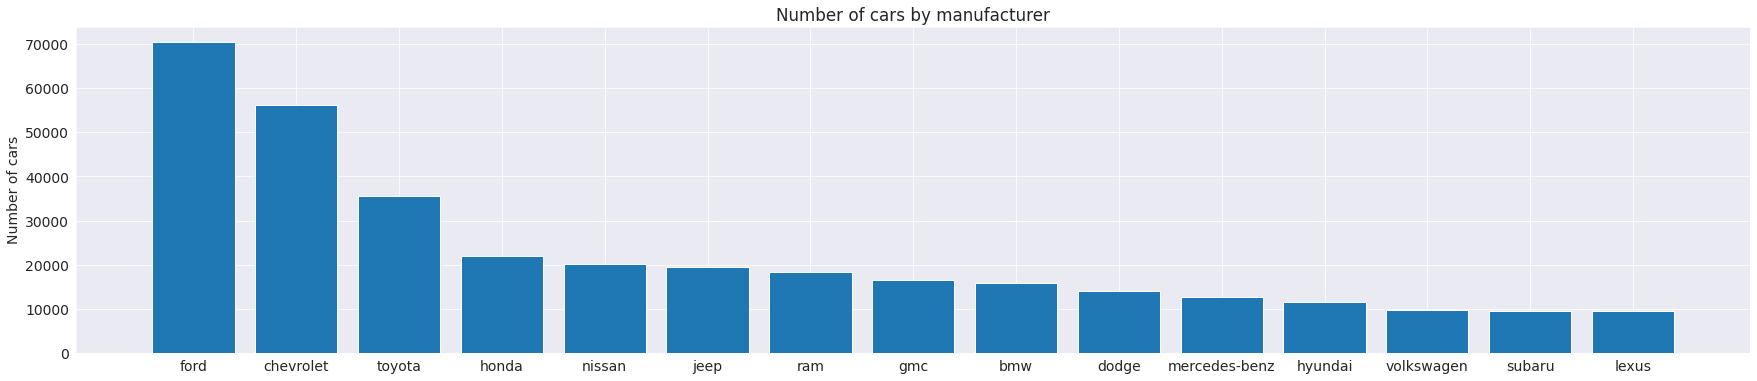

In [13]:
cars_manufacturers = cars_df.groupby('manufacturer').id.count().sort_values(ascending=False).head(15)
plt.figure(figsize=(30, 6))
plt.bar(cars_manufacturers.index, cars_manufacturers.values);
plt.ylabel('Number of cars');
plt.title('Number of cars by manufacturer');

This dataset is scraped from a US website. The top selling brands are domestic (Ford, GM) and japanese (Toyota, Honda).<br>
In the next plot, we will consider the geographical distribution of the data, based on the **state** column.

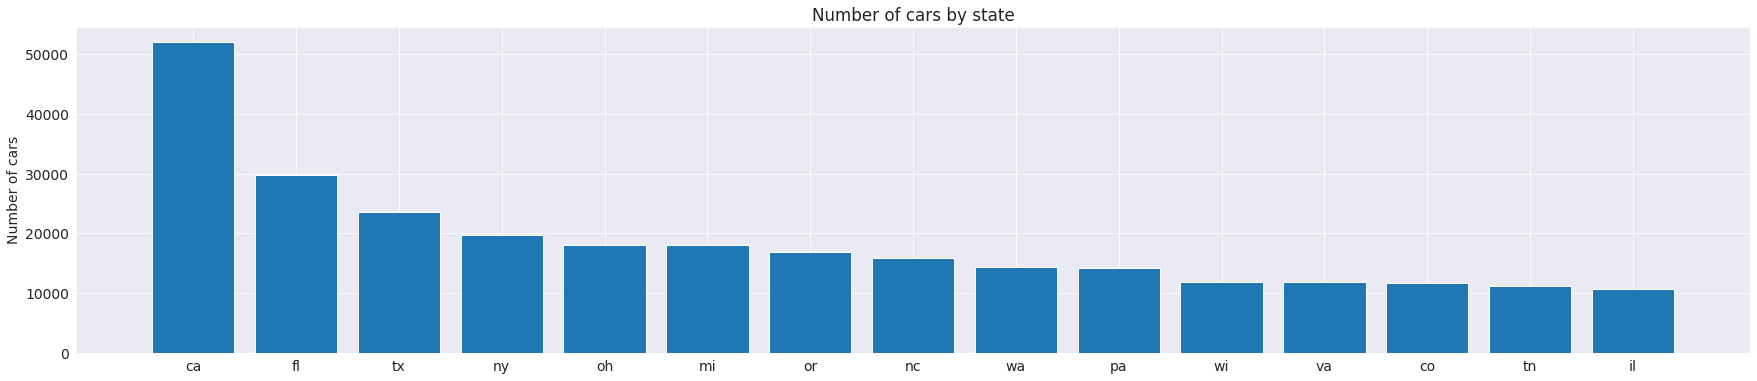

In [14]:
cars_state = cars_df.groupby('state').id.count().sort_values(ascending=False).head(15)
plt.figure(figsize=(30, 6))
plt.bar(cars_state.index, cars_state.values);
plt.ylabel('Number of cars');
plt.title('Number of cars by state');

It appears that California has the most data, which is expected due to its large population. That being said, the dataset is balanced when considering the other states.<br>
The number of used cars for sale is related to the age of the vehicule. We can see this relationship through the column **year**. We will not consider cars made prior to 1980 in order to get a better graph.

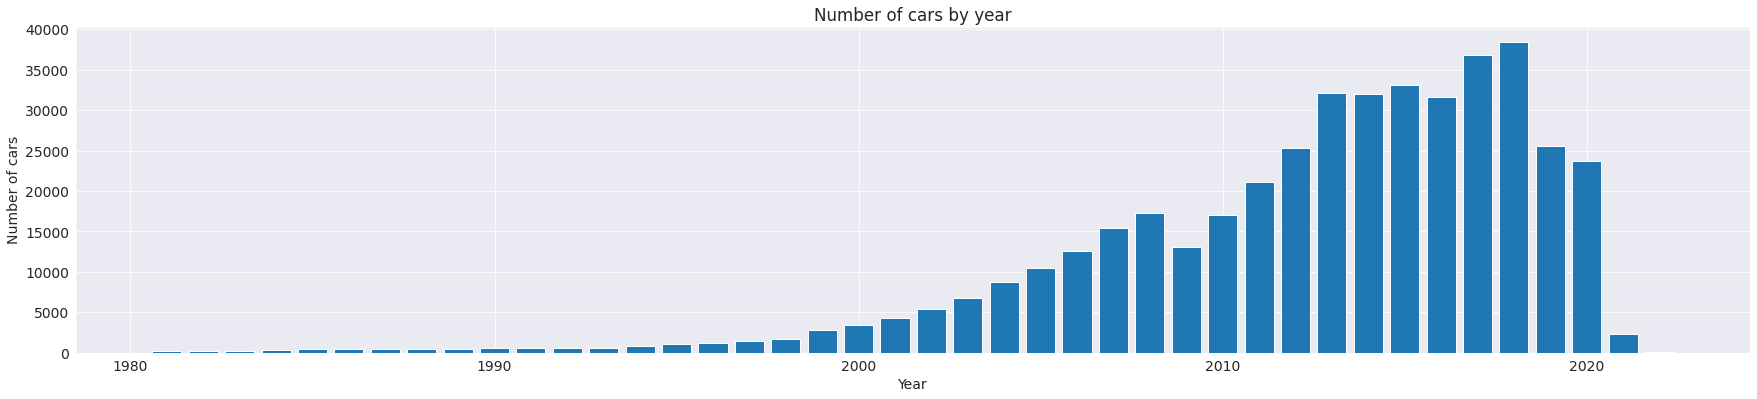

In [15]:
cars_year = cars_df[cars_df['year']>1980].groupby('year').id.count()
plt.figure(figsize=(30, 6))
plt.bar(cars_year.index, cars_year.values);
plt.xlabel('Year')
plt.ylabel('Number of cars');
plt.title('Number of cars by year');

We can see a drop in the number of available cars in 2009. Could it be related to the drop in new cars sales during the previous year (subprime crisis) and the bankruptcy of car manufacturers ? The same reasoning could be applied to 2020 with the Covid-19 pandemic. More reseach is needed to confirm this hypothesis.<br>
Let establish the relationship between the average price of cars and some other factors including : Year, Manufacturer and State. We will consider cars made after 1980 to ease comparison. The outliers in term of car prices will be removed as well. 

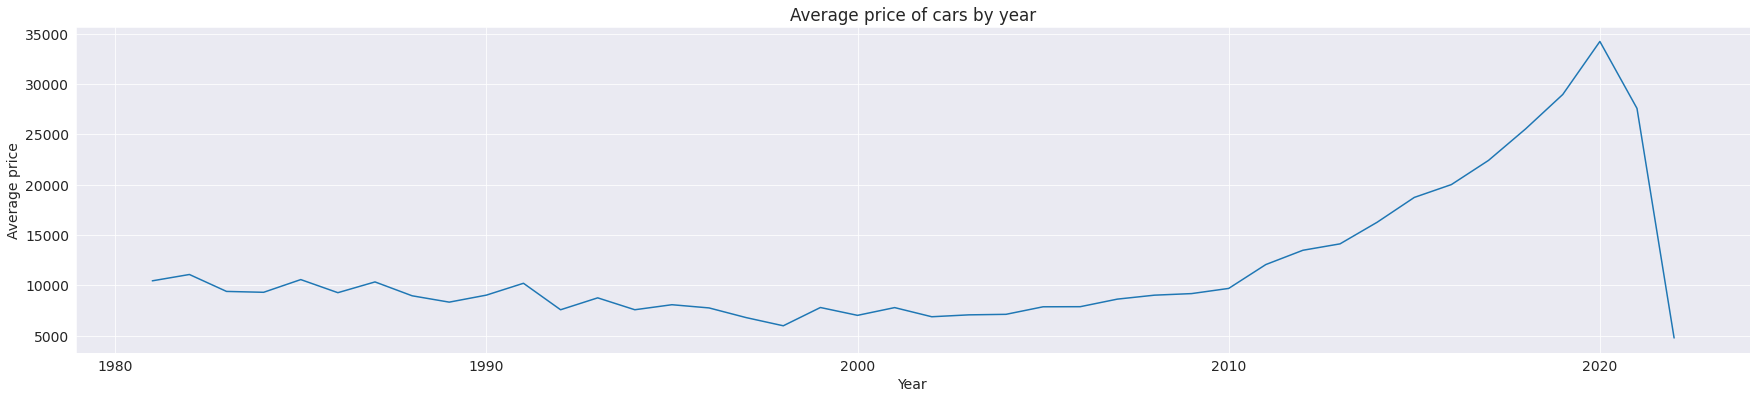

In [16]:
cars_df2 =  cars_df[cars_df['year']>1980] # cars newer than 1980
cars_df2 = cars_df2[cars_df2.price <100000] # cars cost less than 100k
cars_df2 = cars_df2[cars_df2.odometer <1000000] # odometer less than 1000000Miles
price_vs_year = cars_df2.groupby('year').price.mean()
price_vs_year 
plt.figure(figsize=(30, 6))
plt.plot(price_vs_year.index, price_vs_year .values);
plt.xlabel('Year')
plt.ylabel('Average price');
plt.title('Average price of cars by year');

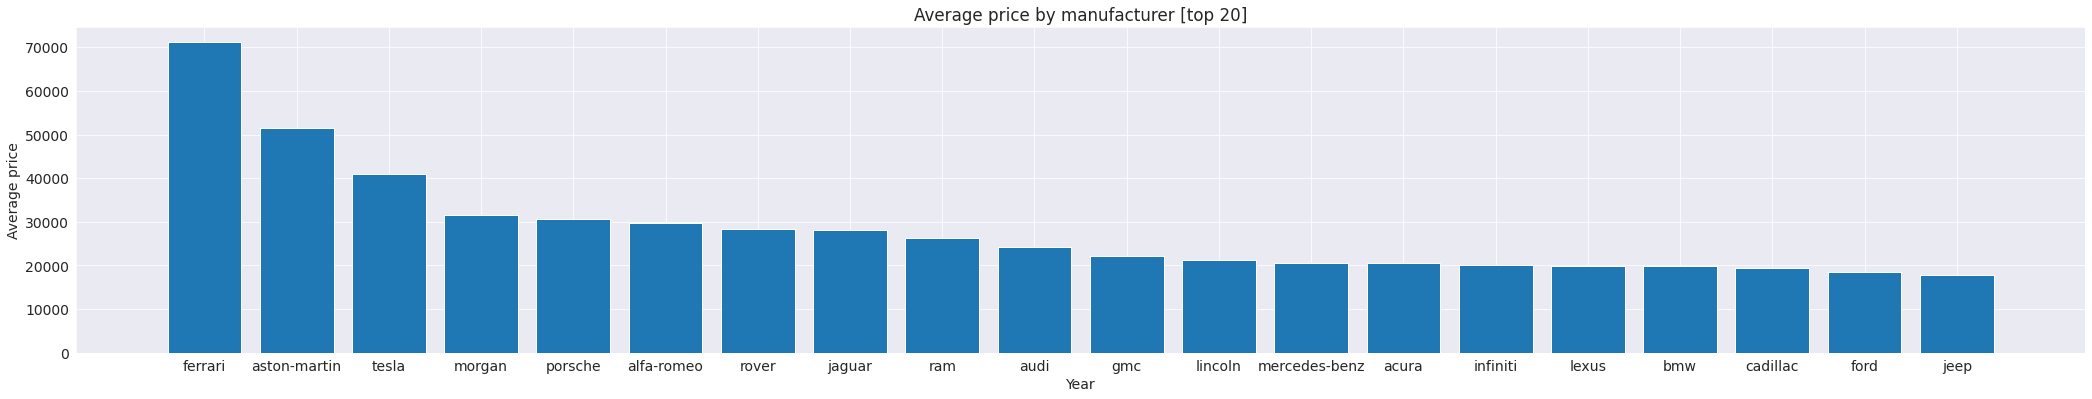

In [17]:
price_vs_manufacturer = cars_df2.groupby('manufacturer').price.mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(36, 6))
plt.bar(price_vs_manufacturer.index, price_vs_manufacturer.values);
plt.xlabel('Year')
plt.ylabel('Average price');
plt.title('Average price by manufacturer [top 20]');

Obviously newer cars are more expensive than older cars, unless we consider very old cars which is collectors territory. The price by manufacturer graph shows some interesting facts. Tesla average price is higher than some luxury cars. This is probably due to the fact that Tesla is a new car manufacturer. The inventory of electric cars for sale is still recent and prices are higher.  

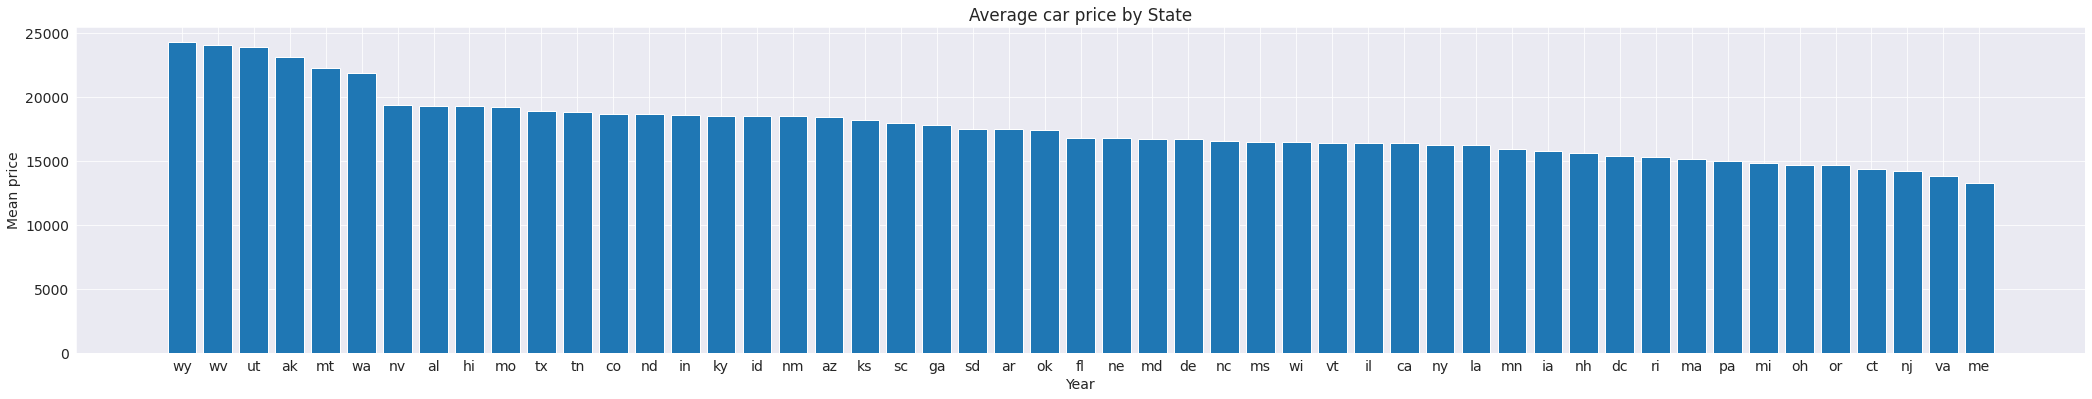

In [18]:
price_vs_state = cars_df2.groupby('state').price.mean().sort_values(ascending=False)
plt.figure(figsize=(36, 6))
plt.bar(price_vs_state.index, price_vs_state.values);
plt.xlabel('Year')
plt.ylabel('Mean price');
plt.title('Average car price by State');

We can observe that the prices can vary significantly between states. The local taxes, emission standards, and type of vehicules can affect greatly the mean price. In the top 10 for instance, we could find many rural states, where the most common vehicules are full-size trucks.

A scatter plot will show the relationship between mileage, age and sell price of used cars.


Text(0, 0.5, 'Mileage')

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


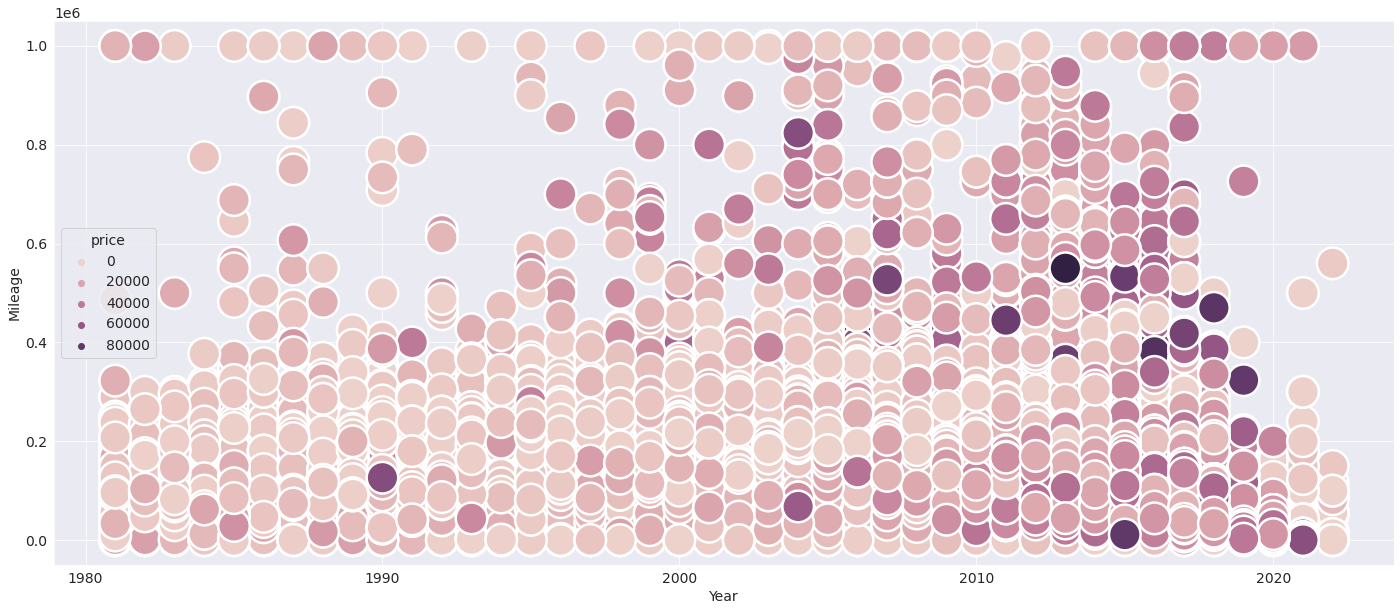

In [19]:
plt.figure(figsize=(24, 10));
sns.scatterplot(x='year', y='odometer', hue='price', data=cars_df2, s=1000)
plt.xlabel('Year')
plt.ylabel('Mileage')

The darker colors refer to higher prices. We can observe that in general, the price is higher for recent cars, with low mileage. But by looking at the graph, we can spot multiple exceptions. This could be related to outliers, or to specific car models / makes. As we said earlier, the car purshase process is very affected by emotion. Mileage and year of manufacture are not the only factors to consider.

Let's plot the different fuel types available in the US market, based on data from the last 40 years.

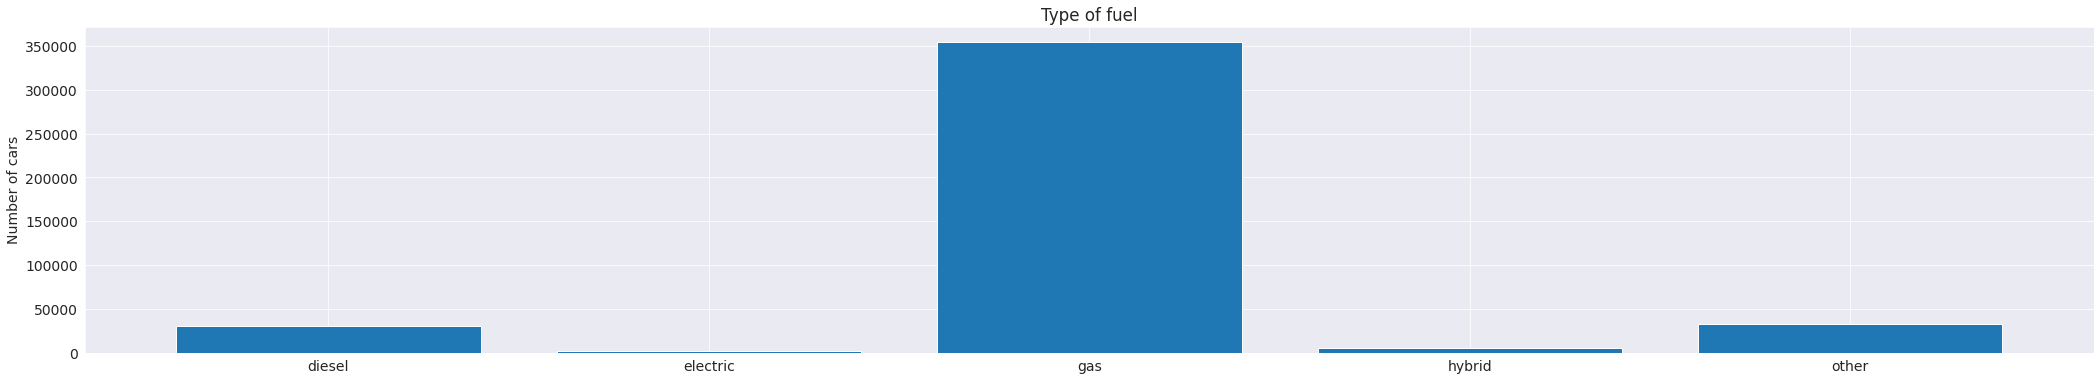

In [20]:
fuel_types = cars_df2.groupby('fuel').id.count()
plt.figure(figsize=(36, 6))
plt.bar(fuel_types.index, fuel_types.values);
plt.ylabel('Number of cars');
plt.title('Type of fuel');

No surprise ! the gasoline-powererd cars are the most popular cars in the US, including trucks. This is very different then other parts of the world, where diesel is more frequent. 

## Asking and Answering Questions

For the next section, we will use the cars_df2 dataset, wich contains data from 1980 to today.  
Q1 : what is the most popular car model in the USA ? are there any differences between states ?

In [21]:
us_top_cars = cars_df2.groupby('model').id.count().sort_values(ascending=False).head(15)
us_top_cars

model
f-150             7836
silverado 1500    5387
1500              4266
camry             3274
accord            3219
silverado         3033
civic             2982
escape            2916
altima            2771
wrangler          2767
grand cherokee    2692
tacoma            2664
2500              2659
explorer          2476
corolla           2373
Name: id, dtype: int64

The Ford F-150 is the most sold car in the US in general, the second being another truck (Silverado 1500). Let's see if this varies between states:

In [22]:
states = cars_df2.state.unique()
# print the top 5 selling vehicules per state
for state in states :
    h = cars_df2[cars_df2['state']==state].groupby('model').id.count().sort_values(ascending=False).head(5)
    print('Top selling cars in ({}) are {}, with {} sales.'.format(state, list(h.index), list(h.values)))

Top selling cars in (al) are ['f-150', 'silverado 1500', 'f250', 'camry', 'corolla'], with [93, 53, 50, 45, 43] sales.
Top selling cars in (ak) are ['f-150', 'silverado 1500', 'silverado', '1500', 'grand cherokee'], with [123, 106, 84, 57, 57] sales.
Top selling cars in (az) are ['f-150', 'silverado 1500', '1500', 'camry', 'mustang'], with [116, 66, 60, 56, 54] sales.
Top selling cars in (ar) are ['silverado 1500', '1500', 'f-150', '2500', 'expedition'], with [158, 82, 70, 46, 46] sales.
Top selling cars in (ca) are ['f-150', 'accord', 'tacoma', 'civic', 'camry'], with [669, 506, 492, 472, 455] sales.
Top selling cars in (co) are ['f-150', 'grand cherokee', 'outback', '3500', 'tacoma'], with [261, 166, 141, 123, 120] sales.
Top selling cars in (ct) are ['forester', 'impreza', 'wrangler', 'civic', 'outback'], with [75, 62, 58, 52, 51] sales.
Top selling cars in (dc) are ['f-150', 'civic', 'camry', 'accord', 'altima'], with [69, 68, 42, 42, 40] sales.
Top selling cars in (de) are ['accor

It seems like F-150 is the most sold car (truck) in most of the states.<br> Some exceptions exist still like in **Nevada (NV), Delaware (DE), Connecticut (CT)**. According to the dataset, one of the most sold vehicule in **Rhodes Island (RI)** is Freightliner M2 (a large size truck). This result requires more investigation to confirm. 

Q2 : What makes/models are used more intensively ?<br>
In order to measure this quality, we could find the average mileage per year for each make/model.

In [23]:
cars_df2['year_mileage']=cars_df2.odometer/(2020-cars_df2['year'][cars_df2.year !=2020])
heavy_duty_models = cars_df2.groupby('model').year_mileage.mean().sort_values(ascending=False).head(15)
heavy_duty_manufacturer = cars_df2.groupby('manufacturer').year_mileage.mean().sort_values(ascending=False).head(15)
print(heavy_duty_models)
print('\n')
print(heavy_duty_manufacturer)

model
Fff                           333333.000000
Nitro Z19                     333333.000000
42t670                        305079.666667
intl prostar                  200000.000000
International LT              193305.200000
2018 International            193014.500000
ranger null                   190046.000000
transit-150                   177063.000000
Any and all                   177000.000000
International® LT             167241.000000
Freightliner cascadia 2017    166190.666667
vnl64t780                     159685.692308
Kenworth T880                 156092.833333
vnl860                        151280.000000
Peterbilt 579                 146139.062500
Name: year_mileage, dtype: float64


manufacturer
ram           19786.978495
gmc           17925.567762
ford          17090.512590
nissan        16852.439939
kia           16802.742241
hyundai       16759.944473
chevrolet     16082.793173
dodge         15778.280261
subaru        15508.318440
volvo         15231.303564
toyota        

The dataset column 'model' requires more improvment/processing. This will allow more precision and improve the precision of visualisations/analysis. The most used vehicules are commercial trucks. When it comes to manufacturer, the results still consists in trucks mainly.

Q3 : which drivetrains are more frequent per state ?

In [24]:
states = cars_df2.state.unique()
for state in states :
    h = cars_df2[cars_df2['state']==state].groupby('drive').id.count().sort_values(ascending=False).head(1)
    print('The most drivetrain in ({}) is {}.'.format(state, list(h.index)))

The most drivetrain in (al) is ['fwd'].
The most drivetrain in (ak) is ['4wd'].
The most drivetrain in (az) is ['fwd'].
The most drivetrain in (ar) is ['4wd'].
The most drivetrain in (ca) is ['fwd'].
The most drivetrain in (co) is ['4wd'].
The most drivetrain in (ct) is ['4wd'].
The most drivetrain in (dc) is ['fwd'].
The most drivetrain in (de) is ['4wd'].
The most drivetrain in (fl) is ['fwd'].
The most drivetrain in (ga) is ['fwd'].
The most drivetrain in (hi) is ['fwd'].
The most drivetrain in (id) is ['4wd'].
The most drivetrain in (il) is ['4wd'].
The most drivetrain in (in) is ['fwd'].
The most drivetrain in (ia) is ['4wd'].
The most drivetrain in (ks) is ['4wd'].
The most drivetrain in (ky) is ['4wd'].
The most drivetrain in (la) is ['fwd'].
The most drivetrain in (me) is ['4wd'].
The most drivetrain in (md) is ['fwd'].
The most drivetrain in (ma) is ['4wd'].
The most drivetrain in (mi) is ['4wd'].
The most drivetrain in (mn) is ['4wd'].
The most drivetrain in (ms) is ['fwd'].


4wd (or 4x4 or awd) is very popular in the US. Some states have more emission regulations and fuel-economy taxes. In **CA** for instance, FWD (front wheel drive) are more comon due to higher fuel-efficiency.

Q4 : Which car brand depreciates the most ?<br>
For each manufacturer, we have to measure the drop in the average price, per year. We will consider the depreciation during the first 5 years.

In [25]:
deprec_df=cars_df[['manufacturer', 'year', 'price']].dropna(subset=['manufacturer'], axis = 0)
years = [2019,2014]
mean_price=[]
for year in years:
    mean_price.append([year,deprec_df[deprec_df['year']==year].groupby('manufacturer').price.mean()])


In [26]:
manufacturers = [i for i in mean_price[0][1].index if i in mean_price[1][1].index]
depreciation =[]
for manufacturer in manufacturers:
    delta = (mean_price[0][1][manufacturer]-mean_price[1][1][manufacturer])/mean_price[0][1][manufacturer]
    depreciation.append(delta)
    print('manufacturer : {} depreciation in 5 years : {:.2f}%'.format(manufacturer,delta*100))

print('The most depreciating brand is {}'.format(manufacturers[np.argmax(depreciation)]))

manufacturer : acura depreciation in 5 years : 61.69%
manufacturer : audi depreciation in 5 years : 59.43%
manufacturer : bmw depreciation in 5 years : 55.79%
manufacturer : buick depreciation in 5 years : 41.72%
manufacturer : cadillac depreciation in 5 years : 55.06%
manufacturer : chevrolet depreciation in 5 years : 57.85%
manufacturer : chrysler depreciation in 5 years : 59.10%
manufacturer : dodge depreciation in 5 years : 53.18%
manufacturer : ferrari depreciation in 5 years : 74.97%
manufacturer : fiat depreciation in 5 years : 60.03%
manufacturer : ford depreciation in 5 years : 42.50%
manufacturer : gmc depreciation in 5 years : 37.28%
manufacturer : harley-davidson depreciation in 5 years : -30.08%
manufacturer : honda depreciation in 5 years : 39.12%
manufacturer : hyundai depreciation in 5 years : 49.22%
manufacturer : infiniti depreciation in 5 years : 57.56%
manufacturer : jaguar depreciation in 5 years : 16.57%
manufacturer : jeep depreciation in 5 years : 42.31%
manufac

Luxury and european cars, such as Mercedes-Benz and BMW suffer from higher depreciation than japanese cars. Tesla has a low depreciation rate, like most electric cars. Surprisingly, Harley-Davidson has a negative score. This is due mainly to the low number of Harley-Davidson bikes in this dataset. In this case, data is not representative.

In [27]:
cars_df[cars_df['manufacturer']=='harley-davidson'].price.count()

110

Only 110 bikes in 440k cars ad.

## Inferences and Conclusion

We have seen in this analysis that the price of used cars is affected by multiple factors. These factors include : age, mileage, location, brand, etc.<br>
The used dataset in this project is of a good quality in general, but some columns need more _cleaning_ in order to get better precision.<br>
Many intuitions could be made, based on the data we used here. We confirmed also some hypothesis, in particular about depreciation, and the car market in general, in the USA.

## References and Future Work

This analysis was a course project with [Jovian](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas).  

The dataset [offered by AustinReese] was downloaded from [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data). It is generated and updated every 18 months, via [this application](https://github.com/AustinReese/UsedVehicleSearch).<br>
Many potential applications could be imagined, based on the results in this analysis. A prediction model of car prices based on the ad data could be made using machine learning or deep networks. A more in depth knowledge is required in order to select the best features to use in order to get the best prediction model. <br>
We could also use this data to study the market evolution, especially the new car segment : **electric cars**. The impact of major economical events can be correlated to the market evolution as well. 